In [18]:
from netCDF4 import Dataset
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
from scipy.signal import argrelextrema
import pickle
import itertools
import warnings
import kuka_tools as kt
# You can find kuka_tools at https://github.com/robbiemallett/custom_modules/blob/master/kuka_tools.py

In [2]:
directory='../data/ncs'
ku_ranges = np.array(pd.read_csv('../data/ku_ranges.csv')['ku'])
ka_ranges = np.array(pd.read_csv('../data/ka_ranges.csv')['ka'])
ranges = {'ku':ku_ranges,'ka':ka_ranges}

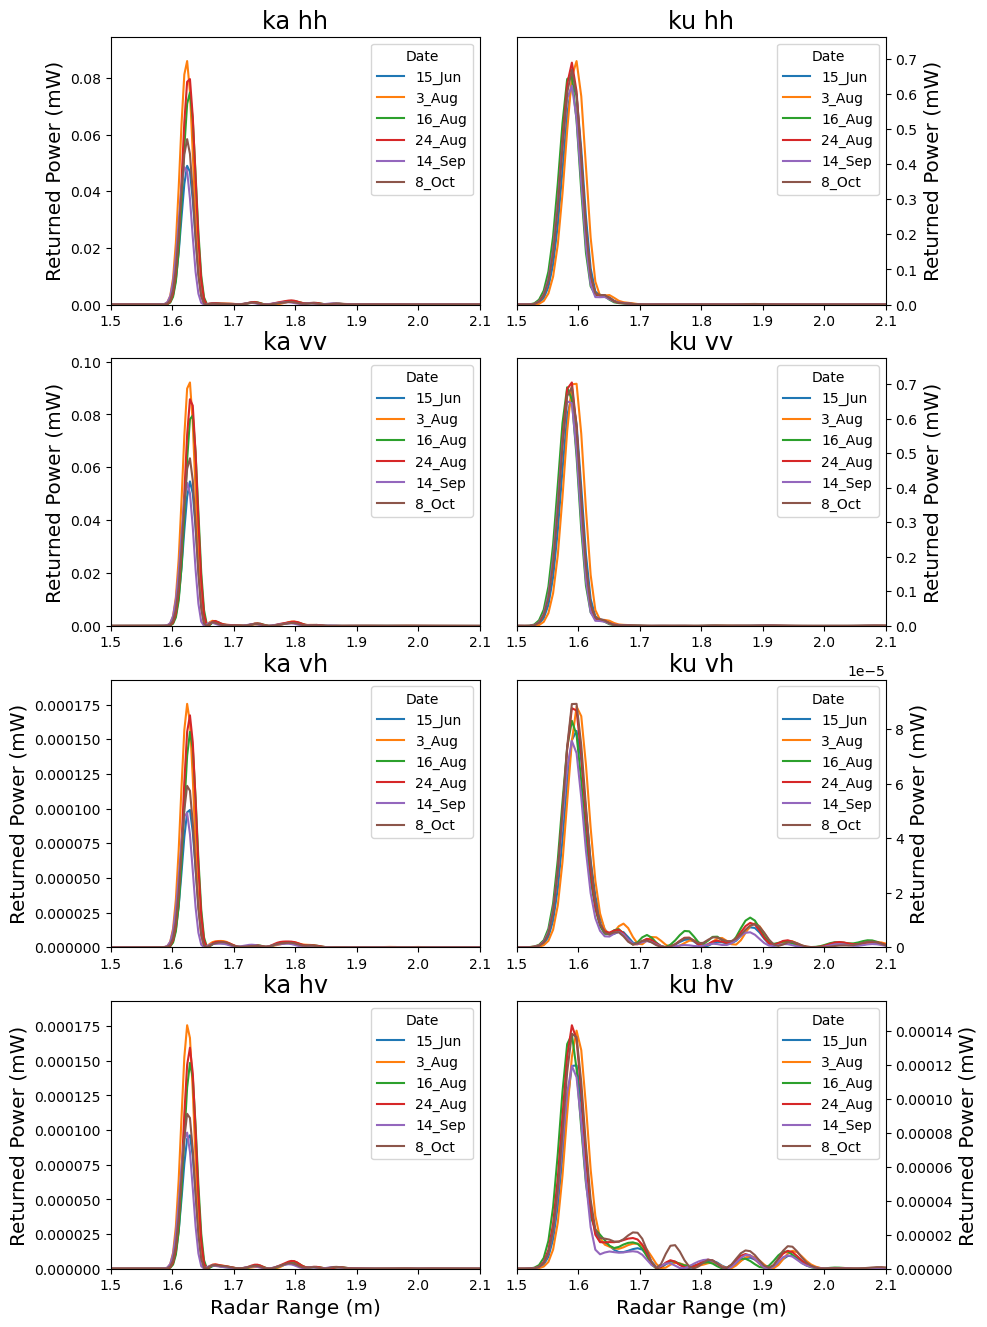

In [35]:
codes = ['15_Jun','3_Aug','16_Aug','24_Aug','14_Sep','8_Oct']

pols = ['hh','vv','vh','hv']

freqs = ['ka','ku']

fig, axs = plt.subplots(4,2,figsize=(10,16))

for ax, (pol,freq) in zip(axs.reshape(-1),itertools.product(pols,freqs)):

    range_vals_for_ylim = []

    for pitno in codes:

        data_dict = pd.read_csv(f'../data/waveforms/Plate_{pitno}_{freq}.csv')

        snow_line = data_dict[pol]

        series = np.log10(snow_line)
        # Or redefine to avoid log scale:
        series = snow_line

        ax.plot(ranges[freq],series,label=pitno)

        range_vals_for_ylim.append(list(series[(ranges[freq]>1.4)&(ranges[freq]<2)]))

    ax.set_ylim(0,np.max(range_vals_for_ylim)+0.1*np.max(range_vals_for_ylim))

    ax.set_ylabel('Returned Power (mW)',fontsize='x-large')
    # ax.set_xlabel('Radar Range (m)',fontsize='x-large')

    ax.set_xlim(1.5,2.1)
    ax.legend(title='Date')
    ax.set_title(f'{freq} {pol}',fontsize='xx-large')

    if freq == 'ku':
        # print('x')
        ax.yaxis.set_label_position("right")
        ax.yaxis.tick_right()

    if pol == 'hv':
        ax.set_xlabel('Radar Range (m)',fontsize='x-large')


    # plt.savefig(f'../figures/{fd}/{freq}_{pol}_all_pits.png')

    # plt.close()

plt.subplots_adjust(wspace=0.1)
plt.savefig('../figures/waveforms.png',dpi=500,bbox_inches='tight')
plt.show()